# Lecture 6-3

# Exploratory Data Analysis

## Week 6 Friday

## Miles Chen, PhD

# Import NHANES Data

We will work with data from NHANES - National Health and Nutrition Examination Survey.

https://wwwn.cdc.gov/Nchs/Nhanes/

We merge two tables from NHANES. 

1) The Demographic information table (DEMO_I) which contains information about the patients' sexes and ages.
2) The Body measures table (BMX_I) which contains information about the height, weight, and other measures.

There are many variables.

Data Dictionaries

https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm

https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bmx = pd.read_sas('BMX_I.XPT')

In [3]:
demo = pd.read_sas('DEMO_I.XPT')

In [4]:
merged = bmx.merge(right = demo, on = 'SEQN')

In [5]:
merged

,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,BMDBMIC,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXSAD1,BMXSAD2,BMXSAD3,BMXSAD4,BMDAVSAD,BMDSADCM,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,83732.0,1.0,94.8,NaN,NaN,NaN,NaN,NaN,184.5,NaN,27.8,NaN,43.3,NaN,43.6,NaN,35.9,NaN,101.1,NaN,22.9,22.7,NaN,NaN,22.8,NaN,9.0,2.0,1.0,62.0,NaN,3.0,3.0,1.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,5.0,1.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,5.397605e-79,5.397605e-79,1.000000e+00,1.0,62.0,1.0,5.0,1.0,3.0,134671.370419,135629.507405,1.0,125.0,10.0,10.0,4.390000e+00
1,83733.0,1.0,90.4,NaN,NaN,NaN,NaN,NaN,171.4,NaN,30.8,NaN,38.0,NaN,40.0,NaN,33.2,NaN,107.9,NaN,27.5,27.1,NaN,NaN,27.3,NaN,9.0,2.0,1.0,53.0,NaN,3.0,3.0,1.0,NaN,2.0,NaN,2.0,2.0,7.0,NaN,3.0,3.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,5.397605e-79,1.0,53.0,2.0,3.0,3.0,NaN,24328.560239,25282.425927,1.0,125.0,4.0,4.0,1.320000e+00
2,83734.0,1.0,83.4,NaN,NaN,NaN,NaN,NaN,170.1,NaN,28.8,NaN,35.6,NaN,37.0,NaN,31.0,NaN,116.5,NaN,26.7,26.5,NaN,NaN,26.6,NaN,9.0,2.0,1.0,78.0,NaN,3.0,3.0,2.0,NaN,1.0,2.0,1.0,1.0,NaN,NaN,3.0,1.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2.0,2.0,5.397605e-79,5.397605e-79,2.000000e+00,2.0,79.0,1.0,3.0,1.0,3.0,12400.008522,12575.838818,1.0,131.0,5.0,5.0,1.510000e+00
3,83735.0,1.0,109.8,NaN,NaN,NaN,NaN,NaN,160.9,NaN,42.4,NaN,38.5,NaN,37.7,NaN,38.3,NaN,110.1,NaN,25.2,25.0,NaN,NaN,25.1,NaN,9.0,2.0,2.0,56.0,NaN,3.0,3.0,2.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,5.0,6.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,5.397605e-79,2.0,56.0,1.0,5.0,6.0,NaN,102717.995647,102078.634508,1.0,131.0,10.0,10.0,5.000000e+00
4,83736.0,3.0,55.2,NaN,NaN,NaN,NaN,NaN,164.9,NaN,20.3,NaN,37.4,NaN,36.0,NaN,27.2,NaN,80.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2.0,2.0,42.0,NaN,4.0,4.0,2.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,4.0,3.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,5.397605e-79,2.000000e+00,5.397605e-79,2.0,42.0,1.0,4.0,3.0,NaN,17627.674984,18234.736219,2.0,126.0,7.0,7.0,1.230000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,93698.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2.0,1.0,2.0,NaN,1.0,1.0,1.0,30.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,7.0,7.0,3.000000e+00,5.397605e-79,1.000000e+00,2.0,77.0,2.0,1.0,2.0,NaN,9594.802391,9896.007775,1.0,121.0,6.0,6.0,5.100000e-01
9540,93699.0,1.0,29.0,NaN,NaN,NaN,NaN,NaN,126.2,NaN,18.2,3.0,NaN,NaN,26.9,NaN,20.7,NaN,62.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2.0,2.0,6.0,NaN,4.0,4.0,2.0,75.0,NaN,NaN,1.0,1.0,NaN,5.397605e-79,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,5.0,5.0,5.397605e-79,2.000000e+00,1.000000e+00,1.0,50.0,1.0,5.0,1.0,NaN,9871.384668,9875.921047,1.0,129.0,15.0,15.0,4.580000e+00
9541,93700.0,1.0,78.2,NaN,NaN,NaN,NaN,NaN,173.3,NaN,26.0,NaN,40.3,NaN,37.5,NaN,30.6,NaN,98.9,NaN,21.7,21.8,NaN,NaN,21.8,NaN,9.0,2.0,1.0,35.0,NaN,3.0,3.0,2.0,NaN,2.0,NaN,2.0,2.0,1.0,NaN,1.0,1.0,NaN,1.0,2.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,5.0,5.0,5.397605e-79,3.000000e+00,5.397605e-79,1.0,35.0,2.0,1.0,1.0,1.0,42314.288108,43194.215112,1.0,126.0,1.0,1.0,5.397605e-79
9542,93701.0,1.0,28.8,NaN,NaN,NaN,NaN,NaN,126.0,NaN,18.1,2.0,30.5,NaN,25.6,NaN,20.8,NaN,62.7,NaN,14.3,14.0,NaN,NaN,14.2,NaN,9.0,2.0,1.0,8.0,NaN,3.0,3.0,2.0,106.0,NaN,NaN,1.0,1.0,NaN,

In [6]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 72 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      9544 non-null   float64
 1   BMDSTATS  9544 non-null   float64
 2   BMXWT     9445 non-null   float64
 3   BMIWT     443 non-null    float64
 4   BMXRECUM  1073 non-null   float64
 5   BMIRECUM  33 non-null     float64
 6   BMXHEAD   215 non-null    float64
 7   BMIHEAD   0 non-null      float64
 8   BMXHT     8769 non-null   float64
 9   BMIHT     105 non-null    float64
 10  BMXBMI    8756 non-null   float64
 11  BMDBMIC   3340 non-null   float64
 12  BMXLEG    7110 non-null   float64
 13  BMILEG    402 non-null    float64
 14  BMXARML   8976 non-null   float64
 15  BMIARML   420 non-null    float64
 16  BMXARMC   8976 non-null   float64
 17  BMIARMC   421 non-null    float64
 18  BMXWAIST  8313 non-null   float64
 19  BMIWAIST  489 non-null    float64
 20  BMXSAD1   6983 non-null   floa

## Do baby boys weigh more than baby girls on average?

The variable for the age in months is `RIDAGEMN`. 

https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEMN

The variable for gender is `RIAGENDR`

https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR

The variable for the weight is `BMXWT`

https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXWT

First, I'll calculate the mean weight of baby boys for each month, from month 0 to 12.

In [7]:
babies = merged.loc[merged.RIDAGEMN <= 12,:].copy()  # subset to select those with age in month 12 and under, and create a copy

In [8]:
babies.shape

(399, 72)

In [9]:
babies.loc[:, 'age'] = babies['RIDAGEMN'].astype(int) # create a column using the int value of age

In [10]:
babyboy = babies.loc[babies.RIAGENDR == 1,:]  # subset to baby boys

In [11]:
babyboy.shape

(192, 73)

In [12]:
boy_wts_month = babyboy.groupby('age')['BMXWT'].mean() # use pandas group_by and set mean

In [13]:
print(boy_wts_month)

age
0      4.794444
1      5.791667
2      6.661111
3      7.000000
4      7.795000
5      8.525000
6      8.263636
7      9.061111
8      9.322222
9     10.093750
10    10.364286
11     9.963636
12    10.523077
Name: BMXWT, dtype: float64


- We'll now Calculate the mean weight of baby girls for each month, from month 0 to 12.

In [14]:
babygirl = babies.loc[babies.RIAGENDR == 2,:]  # subset to baby girls

In [15]:
babygirl.shape

(207, 73)

In [16]:
girl_wts_month = babygirl.groupby('age')['BMXWT'].mean() # use pandas group_by and set mean

In [17]:
girl_wts_month

age
0     4.508333
1     5.457143
2     5.712500
3     6.553846
4     7.052941
5     7.647059
6     8.005263
7     8.190909
8     8.303704
9     9.243750
10    9.066667
11    9.100000
12    9.757143
Name: BMXWT, dtype: float64

- We calculate the difference between the mean weights of boys and girls for each month

In [18]:
mean_difference = boy_wts_month - girl_wts_month

In [19]:
mean_difference

age
0     0.286111
1     0.334524
2     0.948611
3     0.446154
4     0.742059
5     0.877941
6     0.258373
7     0.870202
8     1.018519
9     0.850000
10    1.297619
11    0.863636
12    0.765934
Name: BMXWT, dtype: float64


- We make a line plot showing two lines: one for boys' mean weights months 0-12, and one for girls' mean weights 0-12


<Axes: xlabel='age'>

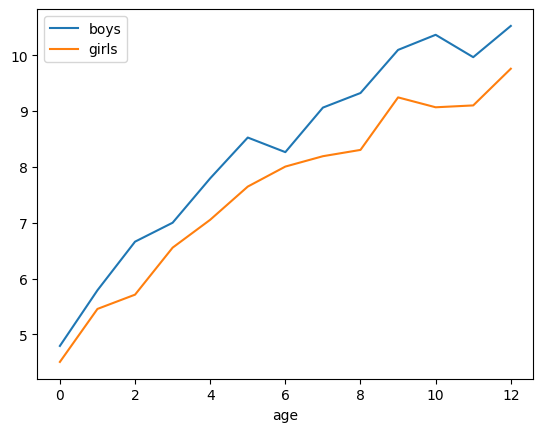

In [20]:
month_wts = pd.DataFrame({'boys': boy_wts_month, 'girls': girl_wts_month})
month_wts.index = month_wts.index.astype('int')
month_wts.plot()

### Comments:

The data shows that for each month, the mean weight of baby boys is greater than the mean weight of baby girls.

The mean weight of girls was never greater than the mean weight of boys.

## What is the relationship between height, leg length, and arm length? Does this relationship change with age?

The variable for age in years is `RIDAGEYR`
-https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR

The variables for height, leg length, and arm length are: `BMXHT`, `BMXLEG`, `BMXARML`

- https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT
- https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXLEG
- https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXARML

- We filter the data to all adults ( arbitrarily, I choose age 20 and up), who have all three measurements of height, upper leg length, and upper arm length.

In [21]:
limbs = merged.loc[:, ['BMXHT', 'BMXLEG', 'BMXARML', 'RIDAGEYR']].copy()  # extract the needed columns
limbs = limbs.dropna()  # get rid of rows with missing values
adults = limbs.loc[limbs.RIDAGEYR >= 20,].copy() # subset to those with Age 20 and up
print(adults.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5086 entries, 0 to 9543
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BMXHT     5086 non-null   float64
 1   BMXLEG    5086 non-null   float64
 2   BMXARML   5086 non-null   float64
 3   RIDAGEYR  5086 non-null   float64
dtypes: float64(4)
memory usage: 198.7 KB
None


There are 5086 rows

Let's look at the correlation between:

   - standing height and upper leg length
   - standing height and upper arm length
   - upper leg length and upper arm length

In [22]:
print(adults[['BMXHT', 'BMXLEG', 'BMXARML']].corr())  # correlation values

            BMXHT    BMXLEG   BMXARML
BMXHT    1.000000  0.787449  0.797873
BMXLEG   0.787449  1.000000  0.629369
BMXARML  0.797873  0.629369  1.000000


I'll use `pandas.cut()` to make adult age groups by decade: i.e. adults aged 20-29.9, adults aged 30-39.9, ... adults aged 70-79.9, adults aged 80+ (7 groups total).

I'll add the column to the filtered data.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

In [23]:
agegroups = pd.cut(adults.RIDAGEYR, bins = np.arange(20, 99, 10), right = False)


In [24]:
agegroups

0       [60, 70)
1       [50, 60)
2       [70, 80)
3       [50, 60)
4       [40, 50)
          ...   
9536    [70, 80)
9537    [20, 30)
9538    [80, 90)
9541    [30, 40)
9543    [20, 30)
Name: RIDAGEYR, Length: 5086, dtype: category
Categories (7, interval[int64, left]): [[20, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80) < [80, 90)]

In [25]:
adults.loc[:,'age_cat'] = agegroups

In [26]:
adults

,BMXHT,BMXLEG,BMXARML,RIDAGEYR,age_cat
0,184.5,43.3,43.6,62.0,"[60, 70)"
1,171.4,38.0,40.0,53.0,"[50, 60)"
2,170.1,35.6,37.0,78.0,"[70, 80)"
3,160.9,38.5,37.7,56.0,"[50, 60)"
4,164.9,37.4,36.0,42.0,"[40, 50)"
...,...,...,...,...,...
9536,165.8,38.2,37.0,76.0,"[70, 80)"
9537,182.2,43.4,41.8,26.0,"[20, 30)"
9538,152.2,31.3,37.5,80.0,"[80, 90)"
9541,173.3,40.3,37.5,35.0,"[30, 40)"


- For each age group, we calculate the mean of the three values.

In [27]:
summary = adults.groupby('age_cat', observed=True).mean().loc[:,['BMXHT','BMXLEG','BMXARML']]
summary

,BMXHT,BMXLEG,BMXARML
age_cat,,,
"[20, 30)",167.879617,40.064189,37.068919
"[30, 40)",167.488202,39.556128,37.154754
"[40, 50)",166.563244,38.680863,37.094632
"[50, 60)",166.351476,38.163400,37.188784
"[60, 70)",164.977480,37.342707,37.252859
"[70, 80)",164.728016,36.984049,37.350102
"[80, 90)",162.097091,36.516000,36.908000


In [28]:
summary.index = np.arange(20,90,10)  # relabel the index
print(summary)

         BMXHT     BMXLEG    BMXARML
20  167.879617  40.064189  37.068919
30  167.488202  39.556128  37.154754
40  166.563244  38.680863  37.094632
50  166.351476  38.163400  37.188784
60  164.977480  37.342707  37.252859
70  164.728016  36.984049  37.350102
80  162.097091  36.516000  36.908000


<Axes: >

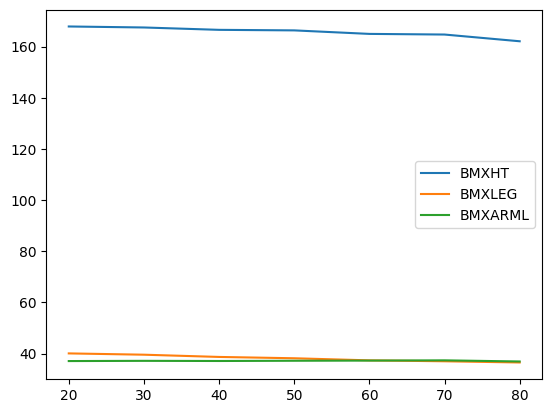

In [29]:
summary.plot()

- Because leg length and arm length are similar in scale, but height is not, I add a fourth column - 'adjusted mean height' - which is the mean height minus 128 cm.

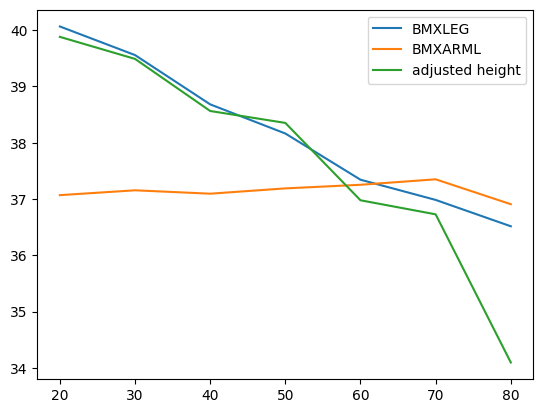

In [30]:
summary['adjusted height'] = summary.BMXHT - 128
summary[['BMXLEG','BMXARML','adjusted height']].plot()
plt.legend()

### Comments

There seems to be a very strong relationship between leg length and height. As people age, the leg length and height both seem to shrink over time.

Arm lenght, on the other hand does not seem to change very much over time. Arm length remains steady, possibly even getting longer over time.

## Is there a relationship between height or weight and income?

In [31]:
income_weight = merged.loc[:, ['BMXHT', 'BMXWT', 'INDHHIN2', 'RIDAGEYR']].copy()  # extract the needed columns
income_weight = income_weight.dropna()  # get rid of rows with missing values
adults_inc_wt = income_weight.loc[income_weight.RIDAGEYR >= 20,].copy() # subset to those with Age 20 and up
print(adults_inc_wt.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5234 entries, 0 to 9543
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BMXHT     5234 non-null   float64
 1   BMXWT     5234 non-null   float64
 2   INDHHIN2  5234 non-null   float64
 3   RIDAGEYR  5234 non-null   float64
dtypes: float64(4)
memory usage: 204.5 KB
None


In [32]:
adults_inc_wt.groupby('INDHHIN2').mean()

,BMXHT,BMXWT,RIDAGEYR
INDHHIN2,,,
1.0,163.310345,79.161207,47.422414
2.0,164.373737,82.143939,54.540404
3.0,162.885535,80.744969,57.805031
4.0,164.984431,81.201198,53.002994
5.0,165.352537,82.597612,51.507463
6.0,165.277990,81.451300,51.038128
7.0,165.874104,81.715339,46.727092
8.0,166.923256,83.625116,46.918605
9.0,166.626888,84.662840,47.407855


<Axes: xlabel='INDHHIN2'>

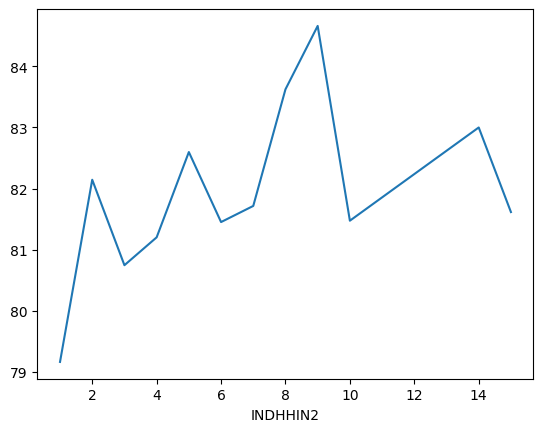

In [33]:
adults_inc_wt.loc[adults_inc_wt.INDHHIN2.isin([1,2,3,4,5,6,7,8,9,10,14,15]),:].groupby('INDHHIN2').mean()['BMXWT'].plot()

<Axes: xlabel='INDHHIN2'>

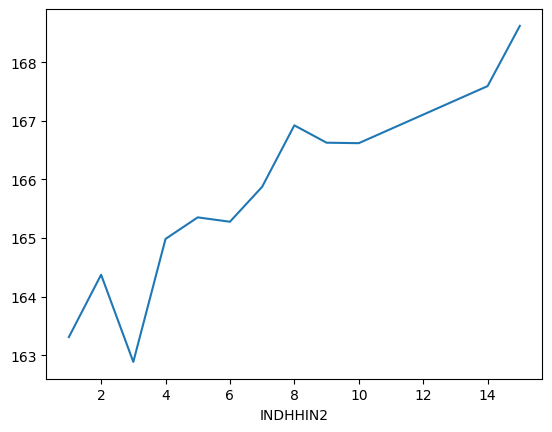

In [34]:
adults_inc_wt.loc[adults_inc_wt.INDHHIN2.isin([1,2,3,4,5,6,7,8,9,10,14,15]),:].groupby('INDHHIN2').mean()['BMXHT'].plot()